## Task 1: Users to Movies


The following example is from from http://web.stanford.edu/class/cs246/slides/06-dim_red.pdf

Consider the following data matrix, $X$, 

<img src="img.png" height="300" width="300" align='center'>

- Here, each row corresponds to the ratings submitted by a single user on a scale of $1$ to $5$ for each of the movies. If a user hasn't submitted a movie rating, then rating is then marked by a zero. 
- By a visual inspection, we see that the movies are either **sci-fi** or **romance**
- The individual movies that we start with can be considered 5 different dimensions, whereas when we group them into two genres (sci-fi or romance), these may be seen as a compressed representation of our data.
- So the natural question is, can we it possible to gain compressed representation of our data matrix to highlight this distinction in our data?


In [2]:
# Import necessary libs:

# 1. import plt from matplotlib
# 2. import Axes3D from mpl_toolkits.mplot3d
# 3. import proj3d from mpl_toolkits.mplot3d
# 4. import FancyArrowPatch from matplotlib.

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch
import numpy as np

In [3]:
# Create the dataset using the np.array() with the data provided above
# Store the number of users for further usages.
# Store the number of movies for further usages.

X = np.array([[1, 1, 1, 0, 0],
              [3, 3, 3, 0, 0],
              [4, 4, 4, 0, 0],
              [5, 5, 5, 0, 0],
              [0, 2, 0, 4, 4],
              [0, 0, 0, 5, 5],
              [0, 1, 0, 2, 2]])


num_users, num_movies = X.shape

#print("Num users ", num_users)
#print("Num movies ", num_movies)


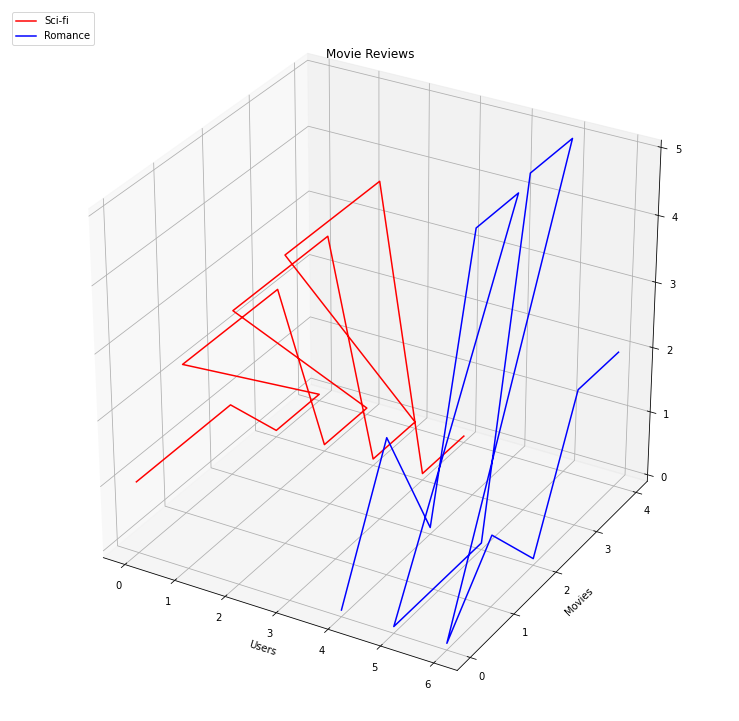

In [4]:
# Plot the data set:

# 1. Create three arrays: users, movie, and reviews. to represent the data matrix
#     that is users[0], movie[0] and reviews[0] represent the review of the first user on the first movie.
# tips: use np.array() and flatten() function

movie_arr = np.array([[i for i in range(num_movies)] for j in range(num_users)])
user_arr = np.array([[j for i in range(num_movies)] for j in range(num_users)])

movie_arr = movie_arr.flatten()
user_arr = user_arr.flatten()

review_arr = X.flatten()

# 2. Set the figure size to (13,13) by using the function plt.figure().

figure = plt.figure(figsize=(13,13))

# 3. Add the subplot that point the 1*1 grid by using the function add_subplot() on the figure object.
#     set the first positional arguments to 111 and projection to 3d.

subplot = figure.add_subplot(1,1,1,projection='3d')

# 4. Set the font size of the legend to be 10 by using plt.rcParams with 'legend.fontsize' as the key.

plt.rcParams.update({'legend.fontsize':10})

# 5. Plot the dataset using plot() for the Sci-fi movie and set x to be the user list, y to be the movie list and z to be the reviews
#     moreover, set resonalbe color and label legend.

subplot.plot(user_arr[:20], movie_arr[:20], review_arr[:20], color='r',label='Sci-fi')

# 6. Plot the dataset using plot() for the Romance follow the pervious instruction.

subplot.plot(user_arr[20:], movie_arr[20:], review_arr[20:], color='b',label='Romance')

# 7. Set the legend to a proper position using ax.legend(loc=?)

subplot.legend(loc="upper left")

# 8. Set label for the x and y axis with proper front size using plt.xlabel(...)

plt.xlabel('Users')
plt.ylabel('Movies')

# 9. Set the title of this fig using plt.title()

plt.title("Movie Reviews")

# 10. Set the ticks for x axis and y aixs by using plt.xticks()/yticks()

plt.xticks([i for i in range(num_users)])
plt.yticks([i for i in range(num_movies)])

# 11. plot and present the fig using plt.show()
plt.show()


In [5]:
# Data Preprocessing:

# 1. Calculate the mean of the data set
# 2. Subtract the mean from the data set
# 3. Store the new centered data set

mean_data = np.mean(X, axis=0)
centered_data = X - mean_data

## Solution1: Implementing PCA using Singular Value Decomposition (SVD)

We start with the simplest and most straightforward strategy first - **Singular Value Decomposition**. <br>

From our Matrix theory, we know that ever matrix out there can we decomposed into a multiplication of 3 matrices (image is from Tim Roughgarden):

$$ X = U S  V^T$$

In class we proved that we can use the SVD to factorize $X^TX=(USV^T)^T(USV^T)=VS^2V^T$.

The principal components of the matrix $A=X^TX$, lie in the rows of matrix $V^T$. Therefore, by selecting the first $k$ columns of $V$, we end up selecting $v_1, v_2, ..., v_k$ vectors.


In [6]:
# Calculate the U, S, V^T:
# 1. Use the singular value decomposition from numpy.
# 2. np.linalg.svd()
# 3. Store the u,s,v^T values

u,s,vT = np.linalg.svd(centered_data)

In [7]:
print("U.shape, S.shape, V.T.shape ->", u.shape, s.shape, vT.shape, end="\n\n")

print("U =",np.around(u, decimals=3), sep="\n", end="\n\n")

print("S =",np.around(s, decimals=3), sep="\n", end="\n\n")

print("V.T =",np.around(vT, decimals=3), sep="\n", end="\n\n")

U.shape, S.shape, V.T.shape -> (7, 7) (5,) (5, 5)

U =
[[ 0.014 -0.691  0.158  0.343 -0.51   0.059 -0.341]
 [ 0.265 -0.142  0.077 -0.059 -0.184 -0.839  0.403]
 [ 0.39   0.133  0.036 -0.596 -0.595  0.329  0.11 ]
 [ 0.516  0.408 -0.004  0.702 -0.158  0.155  0.16 ]
 [-0.388  0.286 -0.686  0.091 -0.47  -0.211 -0.154]
 [-0.546  0.347  0.662  0.099 -0.325 -0.028  0.162]
 [-0.25  -0.34  -0.244  0.115 -0.036  0.339  0.796]]

S =
[10.492  4.09   1.324  0.     0.   ]

V.T =
[[ 0.471  0.374  0.471 -0.456 -0.456]
 [ 0.356  0.412  0.356  0.537  0.537]
 [ 0.389 -0.831  0.389  0.061  0.061]
 [-0.038  0.     0.038 -0.706  0.706]
 [ 0.706 -0.    -0.706 -0.038  0.038]]



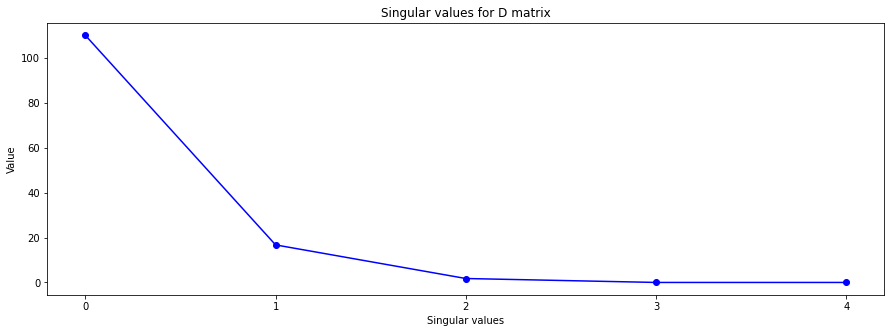

In [8]:
# plot the singlar values for the  D  matrix.
# 1. Calculate the D matrix using s: D is s*s
# 2. Set the fig size to (15,5)
# 3. Add the line chart using plt.plot( ?? ,'bo-')
# 3. Add proper tital, ticks, axis labels

D = s*s

plt.figure(figsize=(15,5))
plt.plot(D,'bo-')
plt.xlabel('Singular values')
plt.ylabel('Value')
plt.title("Singular values for D matrix")
plt.xticks([i for i in range(len(D))])

plt.show()


In [9]:
# Obtaining our compressed data representation:
# 1. Determine at least k singular values are needed to represent the data set from the fig above
# 2. Obtain the first k of v^T and store it
# 3. Calculate the compressed data using np.matmul(), X and stored first k of v^T
# 4. Print the compressed value of X

k1 = vT[:2].T

xcomp = np.matmul(centered_data,k1)

print("The compressed value of X:\n ",xcomp)

The compressed value of X:
  [[ 0.14417203 -2.82787396]
 [ 2.7775391  -0.57977689]
 [ 4.09422264  0.54427165]
 [ 5.41090617  1.66832018]
 [-4.07253971  1.16872711]
 [-5.73177463  1.41792961]
 [-2.6225256  -1.3915977 ]]


Let's visualize what just happened.

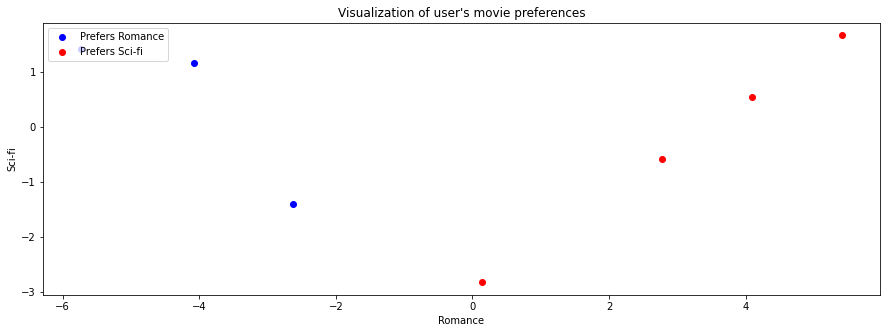

In [10]:
# Visualize what just happened:
# 1. Set the fig size to (15,5)
# 2. Create propor title, axis and legend
# 3. Plot the data

plt.figure(figsize=(15,5))

plt.scatter(xcomp[4:,0], xcomp[4:,1], color='b',label = 'Prefers Romance')
plt.scatter(xcomp[:4,0], xcomp[:4,1], color='r',label = 'Prefers Sci-fi')

plt.xlabel('Romance')
plt.ylabel('Sci-fi')
plt.title("Visualization of user's movie preferences")
plt.legend(loc="upper left")

plt.show()



## Solution2: Directly computing  V and D 

Now we compute $V$ (aka as the eigenvectors), and the diagonal elements of $D$ (aka eigenvalues) from $A=X^TX=V D V^T$

The covariance matrix data matrix, $X$, can be computed as  $\frac{1}{N}X^TX$. <br>
If $X$ is our data matrix comprising of $d$ features. Then $X^TX$ is a $(d \times d)$ symmetrix matrix wherein each entry at location **ij** corresponds to the scalar projection of **feature i** with **feature j**.

In [11]:
# Alternative implementation：
# Directly computing V and D from X and X^T
# 1. Comput XTX using np.matmul() and store it.
# 2. Apply np.linalg.eig() to clculate the eigen vectors and values

XTX = np.matmul(centered_data.T,centered_data)

eigen_val, eigen_vec = np.linalg.eig(XTX)

In [12]:
print("V (Eigen-vectors) = ")
print(np.around(eigen_vec, decimals=3))
print()
print("diagonal elements of D (Eigen-values) = ")
print(np.around(eigen_val, decimals=3)) 
print()
print("sqrt(Eigen-values) = ")
print(np.around(np.sqrt(np.abs(eigen_val)), decimals=3))

V (Eigen-vectors) = 
[[-0.471 -0.356  0.389 -0.009  0.689]
 [-0.374 -0.412 -0.831 -0.     0.   ]
 [-0.471 -0.356  0.389  0.009 -0.689]
 [ 0.456 -0.537  0.061 -0.707 -0.16 ]
 [ 0.456 -0.537  0.061  0.707  0.16 ]]

diagonal elements of D (Eigen-values) = 
[110.093  16.726   1.753  -0.      0.   ]

sqrt(Eigen-values) = 
[10.492  4.09   1.324  0.     0.   ]


Notice the following:
1. That the **square-root of the eigen-values** of the covariance matrix $X^TX$ correspond exactly the the **singular values** of the data matrix $X$.
2. The **eigen-vectors** of $X^TX$ are exactly the same as the column vectors in the matrix $V$ when we performed SVD on $X$.

Therefore, the same Princpal components of our data matrix $X$, may be extracted via SVD or from $X$'s convariance matrix.


## Task 2: Human Faces 

Each image is a 62x47 pixel array. The images are read into a matrix called fea. Each row of the matrix fea represents one image (example). The features (columns) are the pixel values. Each example is represented by a vector of real numbers of length 2914, listing the pixels from left to right, row by row, from top to bottom.

In [13]:
# Import libs:
# 1. numpy
# 2. matplotlib and plt
# 3. pandas
# 4. fetch_lfw_people from sklearn.datasets

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_lfw_people

In [14]:
# Data set:
# 1. Load the dataset using fetch_lfw_people() with min_faces_per_person setted to be 70
#     detail of min_faces_per_person please refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html
# 2. Store the number of images and its hight, width using lfw_people.images.shape
# 3. Calculate number of pixels
# 4. Store the pixel values using lfw_people.data

lfw_people = fetch_lfw_people(min_faces_per_person = 70)

num_images, h, w = lfw_people.images.shape

num_pixels = h*w

pixel_vals = lfw_people.data

#print("Num images: ",num_images)
#print("Height: ",h )
#print("Width: ",w)
#print("Pixels ",num_pixels)


In [15]:
def plt_face(x):
    global h,w
    plt.imshow(x.reshape((h, w)), cmap=plt.cm.gray)
    plt.xticks([])

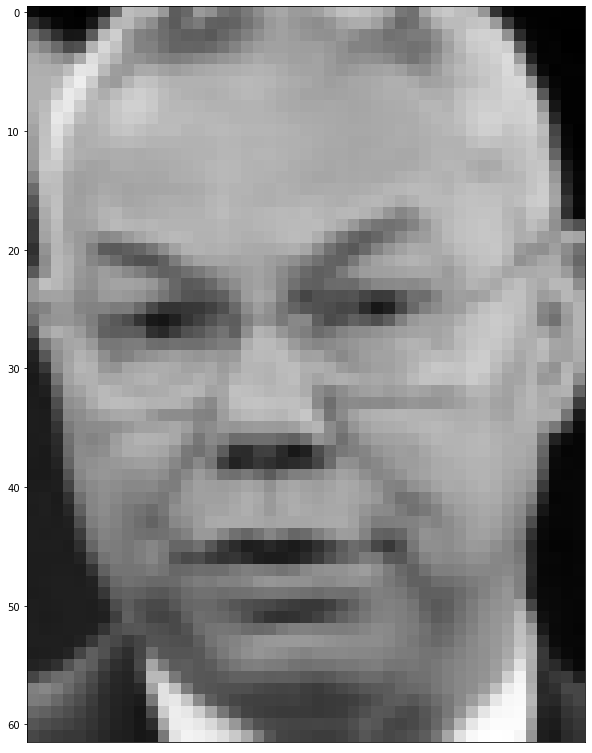

In [16]:

# Use the function we provided above, plot some faces:
# 1. Define the fig size to (10,20)
# 2. Use plt_face()
# 3. plt.show()

plt.figure(figsize=(10,20))
plt_face(pixel_vals[3])
plt.show()

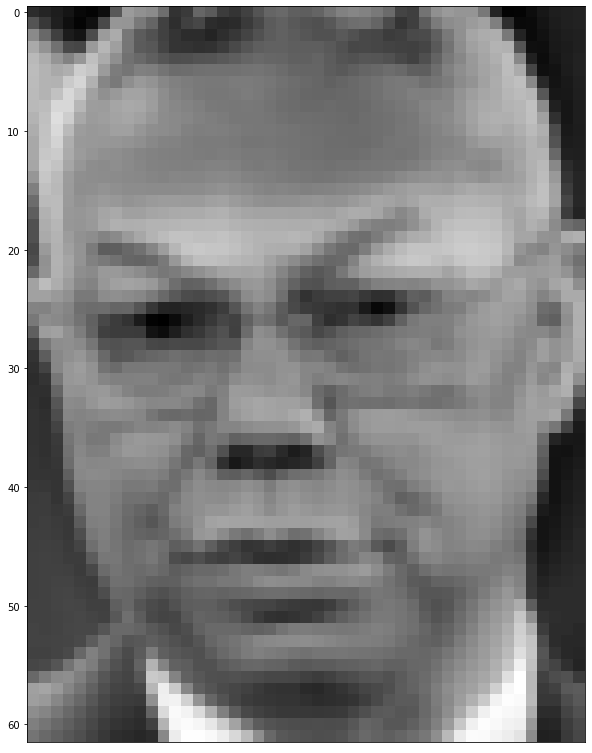

In [17]:
# Find the Mean picture:
# 1. Calculate the mean of the image data
# 2. Remove the mean from all the image
# 3. plot the face use plt_face()

pixel_val_mean = np.mean(pixel_vals, axis=0)
pixel_val_center = pixel_vals - pixel_val_mean

plt.figure(figsize=(10,20))
plt_face(pixel_val_center[3])
plt.show()

In [18]:
# Find eig vec and eig value:
# 1. Calculate the covariance metric of the zero_mean data

covar = np.matmul(pixel_val_center.T,pixel_val_center)

# 2. Use the np.linalg.eig() to compute eig value and eig vectors

eigen_val, eigen_vec = np.linalg.eig(covar)

# 3. Find the top5 features

top5 = [0,1,2,3,4]

eigen_val = eigen_val[:5]
eigen_vec = eigen_vec.T[:5].T

# 4. Calculate the new value based on the top5 feature.
# 5. Store the new value.

xcomp = np.matmul(pixel_val_center[3], eigen_vec)

In [19]:
print("Top 5 Vector:")
print()
print(eigen_vec.real.tolist())
print()
print("Top 5 EigVal:")
print()
print(eigen_val.real)
print()
print("Associateed 5 attributes in fourth image")
print("Indexing by",top5)
print()
print(pixel_val_center[3][top5])

Top 5 Vector:

[[0.005373429972678423, 0.017459914088249207, 0.017839690670371056, 0.033519238233566284, -0.013145295903086662], [0.005695135332643986, 0.016475625336170197, 0.016025438904762268, 0.035288382321596146, -0.013579614460468292], [0.0061380332335829735, 0.016284329816699028, 0.014887979254126549, 0.03671131283044815, -0.014037939719855785], [0.007016506511718035, 0.018298977985978127, 0.014003134332597256, 0.03776909410953522, -0.014300554059445858], [0.007956034503877163, 0.02073809690773487, 0.01348405983299017, 0.03860314562916756, -0.013201899826526642], [0.008488570339977741, 0.021615033969283104, 0.012607131153345108, 0.04059004411101341, -0.012631905265152454], [0.009634105488657951, 0.020977046340703964, 0.011157396249473095, 0.0419529490172863, -0.011973067186772823], [0.010693605057895184, 0.01986547000706196, 0.008351590484380722, 0.04216865822672844, -0.010956288315355778], [0.011063646525144577, 0.018815146759152412, 0.0048677739687263966, 0.041919443756341934,

In [20]:
print("Top 5 EigVal:")
print()
print(eigen_val.real)

Top 5 EigVal:

[9.8932755e+08 7.9189363e+08 3.8294509e+08 3.1824362e+08 2.7124672e+08]


In [21]:
# project back to the image space where d=5

x_proj = np.matmul(xcomp,eigen_vec.T) + pixel_val_mean


The proejction of fourth image


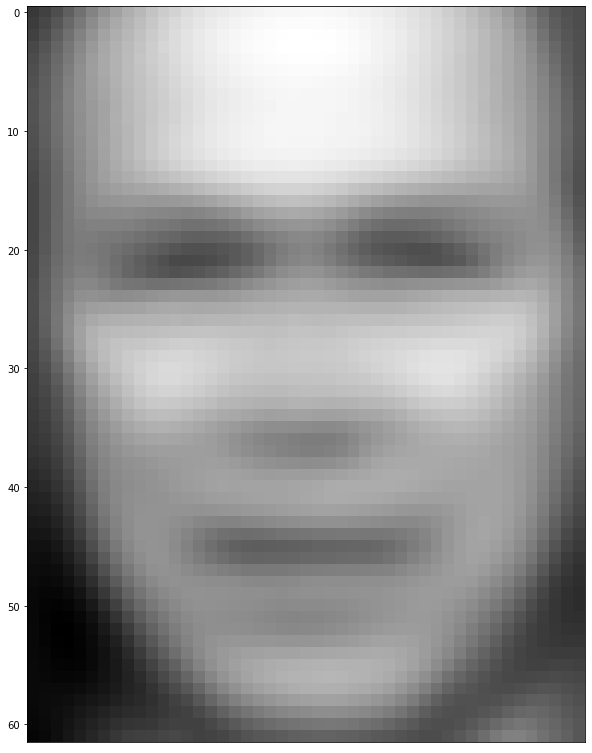

In [22]:
print("The proejction of fourth image")

figure = plt.figure(figsize=(10,20))
plt_face(x_proj)


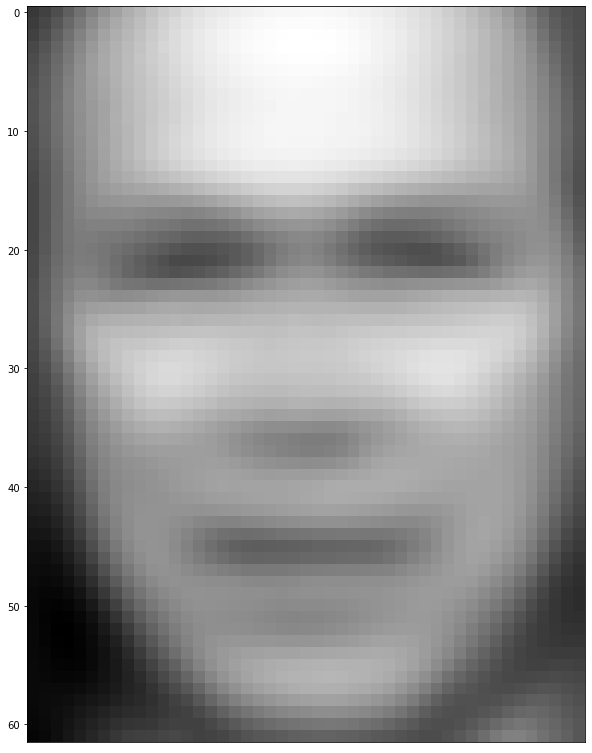

In [23]:
# project back to images where d=50
# 1. Find top 50 eig vec and eig val
# 2. Store the top 50 eig vec
# 3. Store the top 50 eig val
# 4. compute the newfeature using top50 eig vec and eig val.
# 5. plot the feace

top50 = [i for i in range(50)]

covar = np.matmul(pixel_val_center.T, pixel_val_center)

eigen_val, eigen_vec = np.linalg.eig(covar)

eigen_val = eigen_val[:50]
eigen_vec = eigen_vec.T[:50].T

xcomp = np.matmul(pixel_val_center[3], eigen_vec)

x1 = np.matmul(xcomp, eigen_vec.T) + pixel_val_mean

figure = plt.figure(figsize=(10,20))
plt_face(x_proj)
